# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *F*

**Names:**

* Franck Dessimoz
* Vincent Micheli
* Hippolyte Lefebvre

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import collections
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

G = nx.read_edgelist("../data/network1.csv", delimiter=",")
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 13033
Number of edges: 18584
Average degree:   2.8518


**Exercise 2.2: Node degree distribution**

Since it was shown in class that the degree distribution of networks often resembles a power law, we will compute the log-log distribution and the cumulative log-log distribution plot of the degrees.

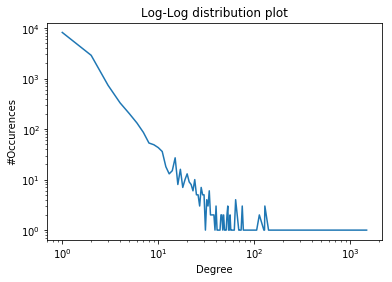

In [2]:
def distrib(G):
    degrees = [G.degree(node) for node in G.nodes()]
    degrees_and_occurences = dict((x,degrees.count(x)) for x in set(degrees))
    lists = sorted(degrees_and_occurences.items(), reverse=True)
    deg, occ = zip(*lists)
    cumul = np.cumsum(occ)
    return deg, occ, cumul

deg, occ, cumul = distrib(G)
    
plt.title("Log-Log distribution plot")
plt.xlabel("Degree")
plt.ylabel("#Occurences")
plt.loglog(deg, occ)
plt.show()

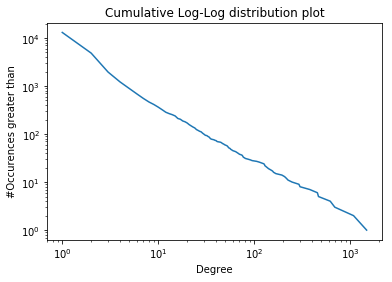

In [3]:
plt.title("Cumulative Log-Log distribution plot")
plt.xlabel("Degree")
plt.ylabel("#Occurences greater than")
plt.loglog(deg, cumul)
plt.show()

The degree distribution is heavy-tailed. A few nodes have very high degree while the rest has low degree.
It looks like we are dealing with a Pareto distribution. As it was shown in class, the gamma parameter of the pareto distribution can be obtained by looking at the slope of the cumulative log-log distribution plot and taking its opposite.

In [4]:
import scipy.stats as sp
print(-sp.linregress(deg, cumul)[0])

0.757453219231


#### Exercise 2.3: Giant component

In [5]:
def giant(G):
    nb_connected = nx.number_connected_components(G)
    graph_connected = nx.connected_components(G)
    component_sizes = [len(gr) for gr in graph_connected]
    component_sizes = sorted(component_sizes, reverse=True)
    print("Number of connected components:", nb_connected)
    print("Size of biggest component:", component_sizes[0])
    print("Size of second biggest component:",component_sizes[1])


In [6]:
giant(G)

Number of connected components: 192
Size of biggest component: 12576
Size of second biggest component: 16


#### Exercise 2.4: Short paths & Small-worlds

In [7]:
biggest = list(nx.connected_component_subgraphs(G))[0]
print("Average shortest path length in the giant component", nx.average_shortest_path_length(biggest))

Average shortest path length in the giant component 4.175488076629283


Which respects D.Watts claim about the average "six degrees of separation".

In [8]:
def reachable(g,start,threshold):
    discovered_nodes = {start}
    reached_per_hops = [1]
    current_neighbors = {start}
    while len(reached_per_hops) <= threshold:
        for n in discovered_nodes:
            current_neighbors.update(g.neighbors(n))
        reached_per_hops.append(len(current_neighbors))
        discovered_nodes = set(current_neighbors)
            
    return reached_per_hops

In [9]:
np.random.seed(19)
random_node = np.random.choice(biggest)
reachable(biggest, random_node, 6)


[1, 2, 620, 4342, 10570, 12202, 12517]

The network is growing exponentially fast and in 6 hops every node is almost certainly reached.

We conclude that network1 is a small world.

#### Exercise 2.5: Network comparison

Name: 
Type: Graph
Number of nodes: 26542
Number of edges: 43516
Average degree:   3.2790


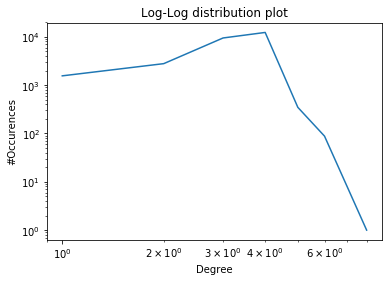

In [10]:
G2 = nx.read_edgelist("../data/network2.csv", delimiter=",")
print(nx.info(G2))

deg2, occ2, cumul2 = distrib(G2)

plt.title("Log-Log distribution plot")
plt.xlabel("Degree")
plt.ylabel("#Occurences")
plt.loglog(deg2, occ2)
plt.show()

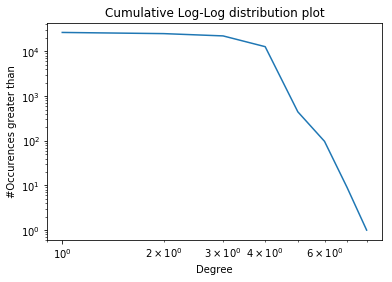

In [11]:
plt.title("Cumulative Log-Log distribution plot")
plt.xlabel("Degree")
plt.ylabel("#Occurences greater than")
plt.loglog(deg2, cumul2)
plt.show()

In [12]:
giant(G2)

biggest2 = list(nx.connected_component_subgraphs(G2))[0]
print("Average shortest path length in the giant component", nx.average_shortest_path_length(biggest2))

np.random.seed(1000)
random_node2 = np.random.choice(biggest2)
reachable(biggest2, random_node2, 6)



Number of connected components: 5
Size of biggest component: 26481
Size of second biggest component: 30
Average shortest path length in the giant component 97.55708682597601


[1, 5, 14, 28, 47, 68, 93]

Hence due to its avg shortest path length and growth rate network 2 does not qualify as a small world.

It appears that network 2 is less "connected" than network 1 even though it has twice as many nodes and almost three times as many edges as in network1.

#### Exercise 2.6: Network identification

Based on our previous remarks and the fact that network 1 has a maximum node degree of 1428 whereas network 2 has a maximum node degree of 8, we deduce that network 2 represents NY roads and network 1 represents internet routers. (Moreover, NY roads were built on the intersections of 4 roads. The degree distribution of network 2 (degree 4 heavy) satisfies this construction.)